In [1]:
# Final version of model-based and data driven approach code
# Turki Haj Mohamad 9/11/2020

feature shape (839, 24)
target shape (839, 1)
speed shape: (839, 1)
target shape: (560,)
feature shape: (560, 24)
20
Features sorted by their score:
[(0.1335, '10'), (0.0864, '23'), (0.0785, '9'), (0.068, '8'), (0.0675, '12'), (0.0617, '17'), (0.06, '20'), (0.0576, '14'), (0.0573, '15'), (0.0451, '22'), (0.0406, '13'), (0.0371, '19'), (0.0331, '21'), (0.0327, '11'), (0.0282, '3'), (0.0234, '16'), (0.0207, '18'), (0.0184, '2'), (0.0151, '5'), (0.0096, '0'), (0.0081, '6'), (0.0072, '1'), (0.0065, '4'), (0.0038, '7')]
0.9783783783783784
0.9885057471264368
0.9662921348314607


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Glyph 9 missing from current font.
Glyph 9 missing from current font.


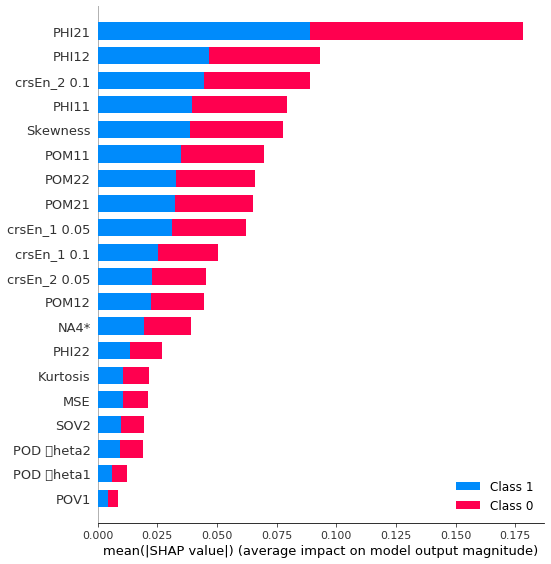

shape of shap values: (2, 375, 24)
shape of shap values: (num_class,num_samples,num_feat)
(375, 24)
(24,)
[0.00250562 0.00269935 0.00306392 0.00379344 0.00422495 0.00618827
 0.00949195 0.00972273 0.01049922 0.01078697 0.0134838  0.01952426
 0.02222474 0.02279344 0.02531108 0.03107975 0.03258536 0.03300341
 0.03480463 0.03889741 0.03975047 0.04448215 0.04660798 0.08905601]
       col_name  feature_importance_vals
10        PHI21                 0.089056
9         PHI12                 0.046608
23  crsEn_2 0.1                 0.044482
8         PHI11                 0.039750
17     Skewness                 0.038897
feature set: [10]
acc: 0.6810810810810811
precision: 0.6829268292682927
recall: 0.6292134831460674
confusion matrix:
 [[70 26]
 [33 56]]
feature set: [10, 9]
acc: 0.9675675675675676
precision: 0.9882352941176471
recall: 0.9438202247191011
confusion matrix:
 [[95  1]
 [ 5 84]]
feature set: [10, 9, 23]
acc: 0.9621621621621622
precision: 0.9767441860465116
recall: 0.9438202247191

In [60]:
# import libraries
import scipy.io
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score


# data loading

# insert filename
filename = 'Data_t2_v2_20505_32feat_839ex.mat'

# select wanted condition
cond2study =2 # 

# random state of random forrest
nn_ =50

# slect numbr of features (should be updated to a feature set)
num_fea = 24

# Loading all the data as data dictionary (featureset target & speed)
input_mat = scipy.io.loadmat(filename)

# print(input_mat.keys())


# select input, speed, target from the data dictionary
Feat_mat = input_mat['Feat_mat'][:,:num_fea]
Target_vec = input_mat['Target_vec']
speed_vec = input_mat['speed_vec']

# Feat_mat = Feat_mat[:,0:24]
print('feature shape',Feat_mat.shape)
print('target shape',Target_vec.shape)
print('speed shape:', speed_vec.shape)

# raise ValueError


# fix dimensionality (shape)
Target_vec = Target_vec.reshape((Target_vec.shape[0],))

# find target/feature vec/mat that match the selected condition
Target_vec_new = Target_vec[(Target_vec==0)|(Target_vec==cond2study)].copy()
print('target shape:',Target_vec_new.shape)

Feat_mat = Feat_mat[(Target_vec==0)|(Target_vec==cond2study),:].copy()
print('feature shape:',Feat_mat.shape)

Target_vec = Target_vec_new.copy()

# represent target 'condition' by 0 & 1
if cond2study ==2:
    Target_vec[Target_vec==cond2study]=1

    
    
# features names

# names = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']
# names2 = ['SOD \theta1','SOD \theta2','POD_theta1','POD_theta2','SOV1','SOV2','POV1','POV2','PHI11','PHI12','PHI21','PHI22','POM11','POM12','POM21','POM22','MeanSqErr','ResSkew','ResKurt','NA4star']

names3 = np.arange(0,25).astype('str')
names5 = ['SOD \theta1','SOD \theta2','POD \theta1','POD \theta2','SOV1','SOV2','POV1','POV2','PHI11','PHI12','PHI21','PHI22','POM11','POM12','POM21','POM22','MSE','Skewness','Kurtosis','NA4*','crsEn_1 0.05','crsEn_2 0.05','crsEn_1 0.1','crsEn_2 0.1']
# names5 = ['SOD_theta1','SOD_theta2','POD_theta1','POD_theta2','SOV1','SOV2','POV1','POV2','PHI11','PHI12','PHI21','PHI22','POM11','POM12','POM21','POM22','MeanSqErr','ResSkew','ResKurt','NA4star','eDD_p05_1','eDD_p05_2','eDD_p05_3','eDD_p1_1','eDD_p1_2','eDD_p1_3','eDD_p06_1','eDD_p06_2','eDD_p06_3','eDD_p18_1','eDD_p18_2','eDD_p18_3']
    
print(len(names2))  
    
# data is ready    
    
#___________________________________________Random Forrest Model_____________________________________________________
    
# devide data    
X = Feat_mat
y = Target_vec
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# rf = RandomForestClassifier(min_samples_split=10,max_depth=5)
rf = RandomForestClassifier(random_state=nn_)

rf.fit(X_train, y_train)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names3), reverse=True))


# import pandas as pd
# XXX = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names4), reverse=True)
# pd.DataFrame(XXX)

y_pred = rf.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score 
confusion_matrix(y_test,y_pred)


print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))


# random forrest model is ready

#________________________________________________SHAP feature ranking___________________________________________________

import shap
fig = plt.figure()
shap_values = shap.TreeExplainer(rf).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar",feature_names=names5)

plt.show()
# fig.savefig('summary_plot.png')

print('shape of shap values:', np.array(shap_values).shape)
print('shape of shap values:','(num_class,num_samples,num_feat)')




#___________________________________________________SHAP values_____________________________________________________

import pandas as pd
vals= np.abs(shap_values).mean(0)
# vals1= np.abs(np.array(shap_values)[0,:,:]).mean(0)
# vals2= np.abs(np.array(shap_values)[1,:,:]).mean(0)

print(np.abs(shap_values).mean(0).shape)
print(np.mean(vals,axis=0).shape)
# print(np.sort(vals1))
# print(np.sort(vals2))
print(np.sort(np.mean(vals,axis=0)))



feature_importance_hy = pd.DataFrame(list(zip(names5, np.mean(vals,axis=0))), columns=['col_name','feature_importance_vals'])
# feature_importance = pd.DataFrame( vals.reshape(-1,2))#, columns=['col_name','feature_importance_vals'])
feature_importance_hy.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
print(feature_importance_hy.head())


#___________________________________________using ranked features______________________________________

feat_set = []
accuracy_score_ =[]
precision_score_ =[]
recall_score_ =[]
c=0
for x in feature_importance_hy.index:
    feat_set.append(x)
    print('feature set:',feat_set)
    rf = RandomForestClassifier()
#     svc1= SVC()
# svc1.fit(X_train[:,1].reshape(-1, 1), y_train)
#     svc1.fit(X_train[:,feat_set], y_train)
#     y_pred = svc1.predict(X_test[:,feat_set])
    rf.fit(X_train[:,feat_set], y_train)
    y_pred = rf.predict(X_test[:,feat_set])

    accuracy_score_.append(accuracy_score(y_test,y_pred))
    precision_score_.append(precision_score(y_test,y_pred))
    recall_score_.append(recall_score(y_test,y_pred))
    
    print('acc:',accuracy_score(y_test,y_pred))
    print('precision:',precision_score(y_test,y_pred))
    print('recall:',recall_score(y_test,y_pred)) 
    cf=confusion_matrix(y_test,y_pred)
    print('confusion matrix:\n',cf)
    